#Importing packages

In [0]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import math
!pip install latex
import latex
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/content/drive')

#Circle

##Creating an image of the circle

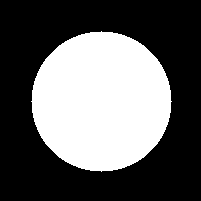

In [0]:
image = cv2.imread("/content/drive/My Drive/186/Activity4/201x201.png") 
cv2.circle(image,(101, 101), 70,(255, 255, 255),thickness = -1)
cv2_imshow(image)

##Getting the Edge Pixels of the Circle

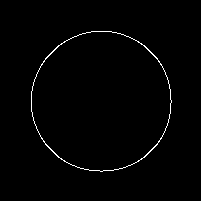

In [0]:
edges = cv2.Canny(image,255,255)
cv2_imshow(edges)

In [0]:
indices = np.where(edges != [0])
coordinates = zip(indices[0], indices[1])
coords = list(coordinates)

##Determining the centroid of the circle and sorting the list with respect to $\theta$.

In [0]:
x = [p[0] for p in coords]
y = [p[1] for p in coords]
centroid = (sum(x) / len(coords), sum(y) / len(coords))
print(centroid)

(100.93103448275862, 100.93103448275862)


In [0]:
coords_polar = list()
for k in coords:
  x =((k[0] - centroid[0]))
  y =((k[1] - centroid[1]))
  r = np.sqrt(x**2 + y**2)
  theta = (np.arctan2(y,x))
  coords_polar.append(tuple((tuple((k[0],k[1])),theta)))

In [0]:
sort_polar = sorted(coords_polar , key=lambda k: [k[1],k[0]])  
#Converting list into an array
sorted_xy = []
for polars in sort_polar:
  sorted_xy.append(polars[0])

##Calculating the Area of the Circle

In [0]:
area = 0
for t in range(len(sorted_xy)-1):
  A = ((sorted_xy[t][0]*sorted_xy[t+1][1]) - (sorted_xy[t][1]*sorted_xy[t+1][0]))
  area += A

##Comparison of Areas (Calculated vs Expected)

In [0]:
print('The expected area of the circle is ',3.14*4900,'units^2.')
print('The calculated area of the circle via Green\'s Theorem is ',area/2,'units^2.')
print('Error in calculation between expected and calculated is', round((((3.14*4900)-(area/2))/(3.14*4900))*100,3),'%.')

The expected area of the circle is  15386.0 units^2.
The calculated area of the circle via Green's Theorem is  15387.5 units^2.
Error in calculation between expected and calculated is -0.01 %.


##Streamlining the *process* into a single definition

In [0]:
def area_calculation(radius,plots = False):
  image = cv2.imread("/content/drive/My Drive/186/Activity4/201x201.png") 
  cv2.circle(image,(101, 101), radius,(255, 255, 255),thickness = -1)
  cv2.imwrite('circle'+str(radius)+'.png',image)
  circleplot = mpimg.imread('circle'+str(radius)+'.png')
  edges = cv2.Canny(image,255,255)
  cv2.imwrite('circle_edges'+str(radius)+'.png',edges)
  circle_edgesplot = mpimg.imread('circle_edges'+str(radius)+'.png')
  indices = np.where(edges != [0])
  coordinates = zip(indices[0], indices[1])
  coords = list(coordinates)
  x = [p[0] for p in coords]
  y = [p[1] for p in coords]
  centroid = (sum(x) / len(coords), sum(y) / len(coords))
  coords_polar = list()
  for k in coords:
    x =((k[0] - centroid[0]))
    y =((k[1] - centroid[1]))
    r = np.sqrt(x**2 + y**2)
    theta = (np.arctan2(y,x))
    coords_polar.append(tuple((tuple((k[0],k[1])),theta)))
  sort_polar = sorted(coords_polar , key=lambda k: [k[1],k[0]])  
  #Converting list into an array
  sorted_xy = []
  for polars in sort_polar:
    sorted_xy.append(polars[0])
  area = 0
  for t in range(len(sorted_xy)-1):
    A = ((sorted_xy[t][0]*sorted_xy[t+1][1]) - (sorted_xy[t][1]*sorted_xy[t+1][0]))
    area += A
  expect = 3.14*(radius**2)
  error = abs(round((((expect)-(area/2))/(expect))*100,3))
  if plots is True:
    fig = plt.figure()
    a = fig.add_subplot(1, 2, 1)
    imgplot = plt.imshow(circleplot,vmin=0, vmax = 255)
    a.set_title('Circle of radius '+str(radius)+' units.')
    a = fig.add_subplot(1, 2, 2)
    imgplot = plt.imshow(circle_edgesplot, cmap = 'binary_r')
    a.set_title('Edge of the circle of radius '+str(radius)+' units.')
    plt.subplots_adjust(wspace =0.9)

  return expect,area/2,error 

#Calculating the Area for various radii

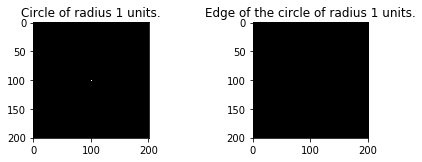

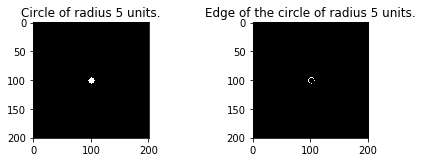

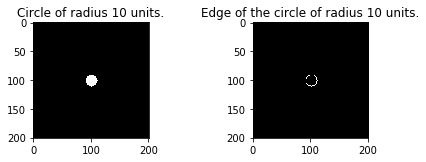

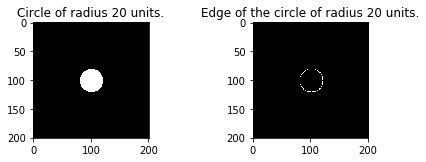

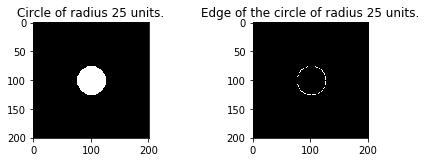

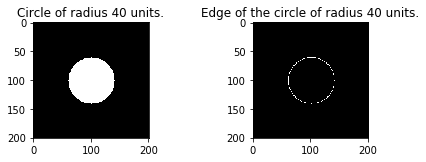

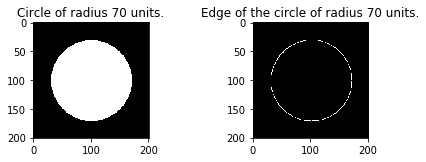

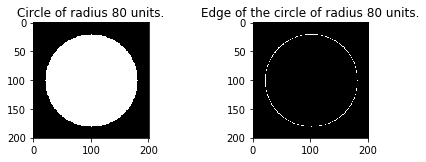

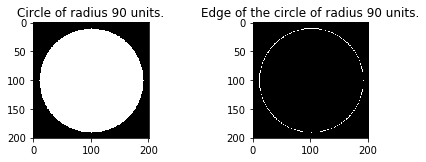

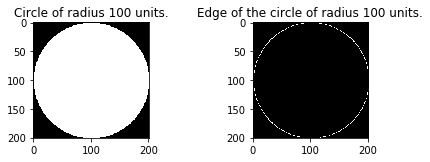

In [0]:
trial_radius = [1,5,10,20,25,40,70,80,90,100]
for z in trial_radius:
  a = area_calculation(int(z),True)

In [0]:
trial_radius2 = np.linspace(1,30,30)
ex = []
cal = []
error = []
for z in trial_radius2:
  a = area_calculation(int(z),False)
  ex.append(a[0])
  cal.append(a[1])
  error.append(a[2])
  print('Circle radius =', z)
  print('The expected area of the circle is ',a[0],'units^2.')
  print('The calculated area of the circle via Green\'s Theorem is ',a[1],'units^2.')
  print('Error in calculation between expected and calculated is',a[2],'%.')
  print('\n')

Circle radius = 1.0
The expected area of the circle is  3.14 units^2.
The calculated area of the circle via Green's Theorem is  54.0 units^2.
Error in calculation between expected and calculated is 1619.745 %.


Circle radius = 2.0
The expected area of the circle is  12.56 units^2.
The calculated area of the circle via Green's Theorem is  61.5 units^2.
Error in calculation between expected and calculated is 389.65 %.


Circle radius = 3.0
The expected area of the circle is  28.26 units^2.
The calculated area of the circle via Green's Theorem is  77.0 units^2.
Error in calculation between expected and calculated is 172.47 %.


Circle radius = 4.0
The expected area of the circle is  50.24 units^2.
The calculated area of the circle via Green's Theorem is  96.5 units^2.
Error in calculation between expected and calculated is 92.078 %.


Circle radius = 5.0
The expected area of the circle is  78.5 units^2.
The calculated area of the circle via Green's Theorem is  128.0 units^2.
Error in cal

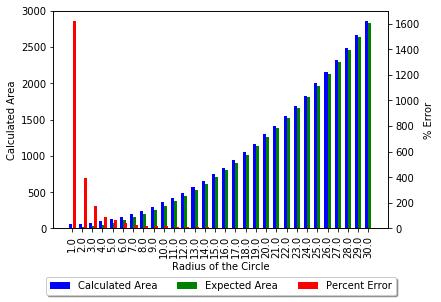

In [0]:
x = trial_radius2
ax1 = plt.subplot(1,1,1)
w = 0.3
#plt.xticks(), will label the bars on x axis with the respective country names.
plt.xticks(x + w /2, x, rotation='vertical')
calc = ax1.bar(x, cal, width=w, color='b', align='center')
exp = ax1.bar(x + w, ex, width=w,color='g',align='center')
#The trick is to use two different axes that share the same x axis, we have used ax1.twinx() method.
ax2 = ax1.twinx()
#We have calculated GDP by dividing gdpPerCapita to population.
err = ax2.bar(x+ (3/2)*w, error, width = w, color = 'red', align = 'center')
#Set the Y axis label as GDP.
plt.ylabel('% Error')
ax1.set_xlabel('Radius of the Circle')
ax1.set_ylabel('Calculated Area')
#To set the legend on the plot we have used plt.legend()
plt.legend([calc, exp, err],['Calculated Area', 'Expected Area', 'Percent Error'],loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)
#To show the plot finally we have used plt.show().

#Rectangle

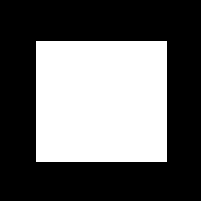

In [0]:
image2 = cv2.imread("/content/drive/My Drive/186/Activity4/201x201.png") 
cv2.rectangle(image2, (36,41), (166,161), (255, 255, 255), thickness= -1)
cv2_imshow(image2)

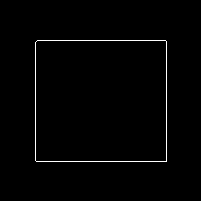

In [0]:
edges2 = cv2.Canny(image2,255,255)
cv2_imshow(edges2)

In [0]:
indices2 = np.where(edges2 != [0])
coordinates2 = zip(indices2[0], indices2[1])
coords2 = list(coordinates2)

In [0]:
x2 = [p[0] for p in coords]
y2 = [p[1] for p in coords]
centroid2 = ((min(x2)+max(x2))/2 , (min(y2)+max(y2))/2)

##Generating rectangles and their corresponding edges

In [0]:
def area_rec_calculation(dx,dy,plots = False):
  image = cv2.imread("/content/drive/My Drive/186/Activity4/201x201.png") 
  
  cv2.rectangle(image,(int(101-(dx/2)), int(101-(dy/2))), (int(101+(dx/2)),int(101+(dy/2))),(255, 255, 255),thickness = -1)
  cv2.imwrite('rectangle'+str(dx)+'x'+str(dy)+'.png',image)
  rectangleplot = mpimg.imread('rectangle'+str(dx)+'x'+str(dy)+'.png')
  
  edges = cv2.Canny(image,255,255)
  cv2.imwrite('rectangle_edges'+str(dx)+'x'+str(dy)+'.png',edges)
  rectangle_edgesplot = mpimg.imread('rectangle_edges'+str(dx)+'x'+str(dy)+'.png')
  
  indices = np.where(edges != [0])
  coordinates = zip(indices[0], indices[1])
  coords = list(coordinates)
  x = [p[0] for p in coords]
  y = [p[1] for p in coords]
  centroid = ((min(x)+max(x))/2 , (min(y)+max(y))/2)
  coords_polar = list()
  for k in coords:
    x =((k[0] - centroid[0]))
    y =((k[1] - centroid[1]))
    r = np.sqrt(x**2 + y**2)
    theta = (np.arctan2(y,x))
    coords_polar.append(tuple((tuple((k[0],k[1])),theta)))
  sort_polar = sorted(coords_polar , key=lambda k: [k[1],k[0]])  
  #Converting list into an array
  sorted_xy = []
  for polars in sort_polar:
    sorted_xy.append(polars[0])
  area = 0
  for t in range(len(sorted_xy)-1):
    A = ((sorted_xy[t][0]*sorted_xy[t+1][1]) - (sorted_xy[t][1]*sorted_xy[t+1][0]))
    area += A
  expect = dx*dy
  error = abs(round((((expect)-(area/2))/(expect))*100,3))
  if plots is True:
    fig = plt.figure()
    a = fig.add_subplot(1, 2, 1)
    imgplot = plt.imshow(rectangleplot,vmin=0, vmax = 255)
    a.set_title(str(dx)+' by '+str(dy)+' Rectangle')
    a = fig.add_subplot(1, 2, 2)
    imgplot = plt.imshow(rectangle_edgesplot, cmap = 'binary_r')
    a.set_title('Edge of '+ str(dx)+' by '+str(dy)+' Rectangle')
    plt.subplots_adjust(wspace =0.25)

  return expect,area/2,error 

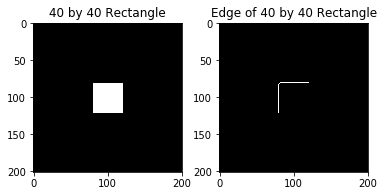

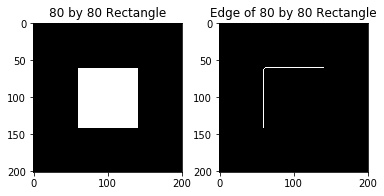

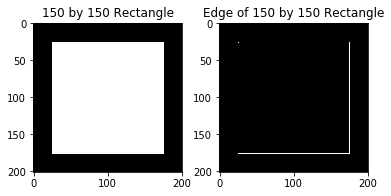

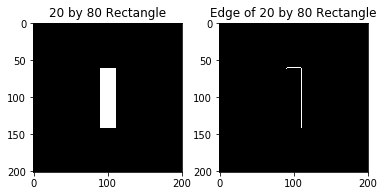

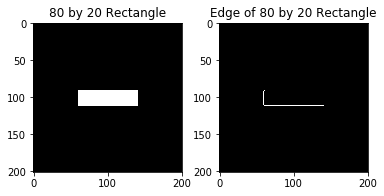

In [0]:
trial_dim = [(40,40),(80,80),(150,150),(20,80),(80,20)]
for z in trial_dim:
  a = area_rec_calculation(z[0],z[1],True)

In [0]:
trial_dim2 = np.linspace(10,150,15)
ex = []
cal = []
error = []
for z in trial_dim2:
  a = area_rec_calculation(z,z)
  ex.append(a[0])
  cal.append(a[1])
  error.append(a[2])
  print('Circle radius =', z)
  print('The expected area of the circle is ',a[0],'units^2.')
  print('The calculated area of the circle via Green\'s Theorem is ',a[1],'units^2.')
  print('Error in calculation between expected and calculated is',a[2],'%.')
  print('\n')

Circle radius = 10.0
The expected area of the circle is  100.0 units^2.
The calculated area of the circle via Green's Theorem is  165.5 units^2.
Error in calculation between expected and calculated is 65.5 %.


Circle radius = 20.0
The expected area of the circle is  400.0 units^2.
The calculated area of the circle via Green's Theorem is  483.0 units^2.
Error in calculation between expected and calculated is 20.75 %.


Circle radius = 30.0
The expected area of the circle is  900.0 units^2.
The calculated area of the circle via Green's Theorem is  1000.5 units^2.
Error in calculation between expected and calculated is 11.167 %.


Circle radius = 40.0
The expected area of the circle is  1600.0 units^2.
The calculated area of the circle via Green's Theorem is  1718.0 units^2.
Error in calculation between expected and calculated is 7.375 %.


Circle radius = 50.0
The expected area of the circle is  2500.0 units^2.
The calculated area of the circle via Green's Theorem is  2635.5 units^2.
Er

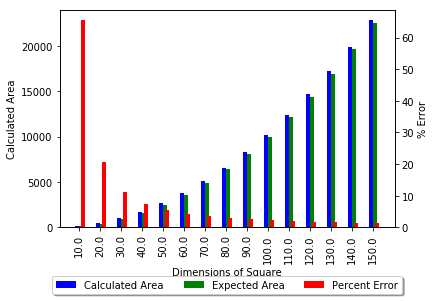

In [0]:
x = trial_dim2
ax1 = plt.subplot(1,1,1)
w = 2
#plt.xticks(), will label the bars on x axis with the respective country names.
plt.xticks(x + w /2, x, rotation='vertical')
calc = ax1.bar(x, cal, width=w, color='b', align='center')
exp = ax1.bar(x + w, ex, width=w,color='g',align='center')
#The trick is to use two different axes that share the same x axis, we have used ax1.twinx() method.
ax2 = ax1.twinx()
#We have calculated GDP by dividing gdpPerCapita to population.
err = ax2.bar(x+ (3/2)*w, error, width = w, color = 'red', align = 'center')
#Set the Y axis label as GDP.
plt.ylabel('% Error')
ax1.set_xlabel('Dimensions of Square')
ax1.set_ylabel('Calculated Area')
#To set the legend on the plot we have used plt.legend()
plt.legend([calc, exp, err],['Calculated Area', 'Expected Area', 'Percent Error'],loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)
#To show the plot finally we have used plt.show().

#Google Map Image of the Quezon City Circle Fountain and Area Calculation

In [0]:
def area_calculation(image):
  edges = cv2.Canny(image,255,255)
  indices = np.where(edges != [0])
  coordinates = list(zip(indices[0], indices[1]))
  coords = list(coordinates)
  x = [p[0] for p in coords]
  y = [p[1] for p in coords]
  centroid = (sum(x) / len(coords), sum(y) / len(coords))
  polar = []
  for i in coordinates:
    x, y = i[0], i[1]
    r = np.sqrt(((x-centroid[0])**2)+((y-centroid[1])**2))
    theta = np.arctan2(y-centroid[1], x-centroid[0])
    polar.append((theta,(x,y)))
  sorted_polar = sorted(polar, key = lambda x: x[0])
  coord = []
  for j in sorted_polar:
    coord.append(j[1])
  
  area = 0
  for i in range(len(coord)-1):
    A = ((coord[i][0]*coord[i+1][1]) - (coord[i][1]*coord[i+1][0]))
    area += A
    
  return area/2

The theoretical area of the CS atrium is 5644.766343237435 m^2.
The area of the CS atrium calculated using Green's Theorem is 5544.0215301807 m^2.
The percent error of the calculation is -1.784747267305922 %.


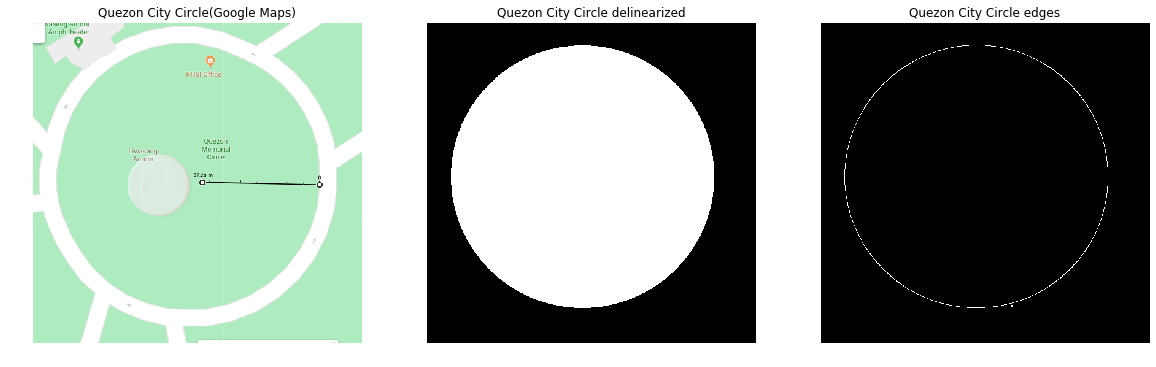

In [0]:
Qcircle = cv2.imread('QCircle.png')
Qcircle_delinearized = cv2.imread("QCircle_delinearize.png")
edges = cv2.Canny(Qcircle_delinearized,255,255)

fig = plt.figure(figsize=(20,12))
ax1_atrium = fig.add_subplot(1,3,1)
ax1_atrium.imshow(Qcircle)
ax1_atrium.set_title('Quezon City Circle(Google Maps)')
ax1_atrium.axis('off')
ax2_atrium = fig.add_subplot(1,3,2)
ax2_atrium.imshow(Qcircle_delinearized)
ax2_atrium.set_title('Quezon City Circle delinearized')
ax2_atrium.axis('off')
ax3_atrium = fig.add_subplot(1,3,3)
ax3_atrium.imshow(edges, plt.get_cmap('binary_r'))
ax3_atrium.set_title('Quezon City Circle edges')
ax3_atrium.axis('off')

theo = np.pi*(84.777/2)**2
act = area_calculation(Qcircle_delinearized)/(5.1**2)
print('The theoretical area of the CS atrium is', theo, 'm^2.')
print("The area of the CS atrium calculated using Green's Theorem is", act, "m^2.")
print('The percent error of the calculation is', ((act-theo)/theo)*100,'%.')